## 1. Importing libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## 2. Reading excel file

In [2]:
df = pd.read_csv(r"C:\Users\sapan\Downloads\Obesity Classification.csv")
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


## 3.Preprocessing steps

### 3.1. Checking datatypes

In [3]:
df.dtypes

ID          int64
Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object

#### From the above result, it is clear that Gender and Label are object type data. Hence, they need to be encoded with labels which will be done later on.

### 3.2. Checking for null values

In [4]:
df.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

### 3.3. Checking for unique values

In [5]:
df.nunique()

ID        108
Age        75
Gender      2
Height     10
Weight     23
BMI        25
Label       4
dtype: int64

In [6]:
df['Label'].unique()

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese'],
      dtype=object)

#### The target values have 4 unique values which are 'Normal Weight', 'Overweight', 'Underweight' and 'Obese'.

### 3.4. Label encoding Gender and Label

In [7]:
labels= LabelEncoder()
label = LabelEncoder()

df['Gender'] = labels.fit_transform(df['Gender'])
df['Label'] = label.fit_transform(df['Label'])
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,0
1,2,30,0,160,60,22.5,0
2,3,35,1,180,90,27.3,2
3,4,40,0,150,50,20.0,3
4,5,45,1,190,100,31.2,1
...,...,...,...,...,...,...,...
103,106,11,1,175,10,3.9,3
104,107,16,0,160,10,3.9,3
105,108,21,1,180,15,5.6,3
106,109,26,0,150,15,5.6,3


#### After label encoding, we have 0 for 'Female' and 1 for 'Male' in Gender column. Similarly, we have 0 for 'Normal Weight', 1 for Obese, 2 for 'Overweight' and 3 for 'Underweight' in Label column.

### 3.5. Dropping 'ID' column

In [8]:
df.drop(labels='ID',axis=1,inplace=True)
df

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,0
1,30,0,160,60,22.5,0
2,35,1,180,90,27.3,2
3,40,0,150,50,20.0,3
4,45,1,190,100,31.2,1
...,...,...,...,...,...,...
103,11,1,175,10,3.9,3
104,16,0,160,10,3.9,3
105,21,1,180,15,5.6,3
106,26,0,150,15,5.6,3


#### We are dropping ID column since it does not contribute to the prediction of the target variable.

## 4. Analysis and Visualization

### 4.1. For Correlation

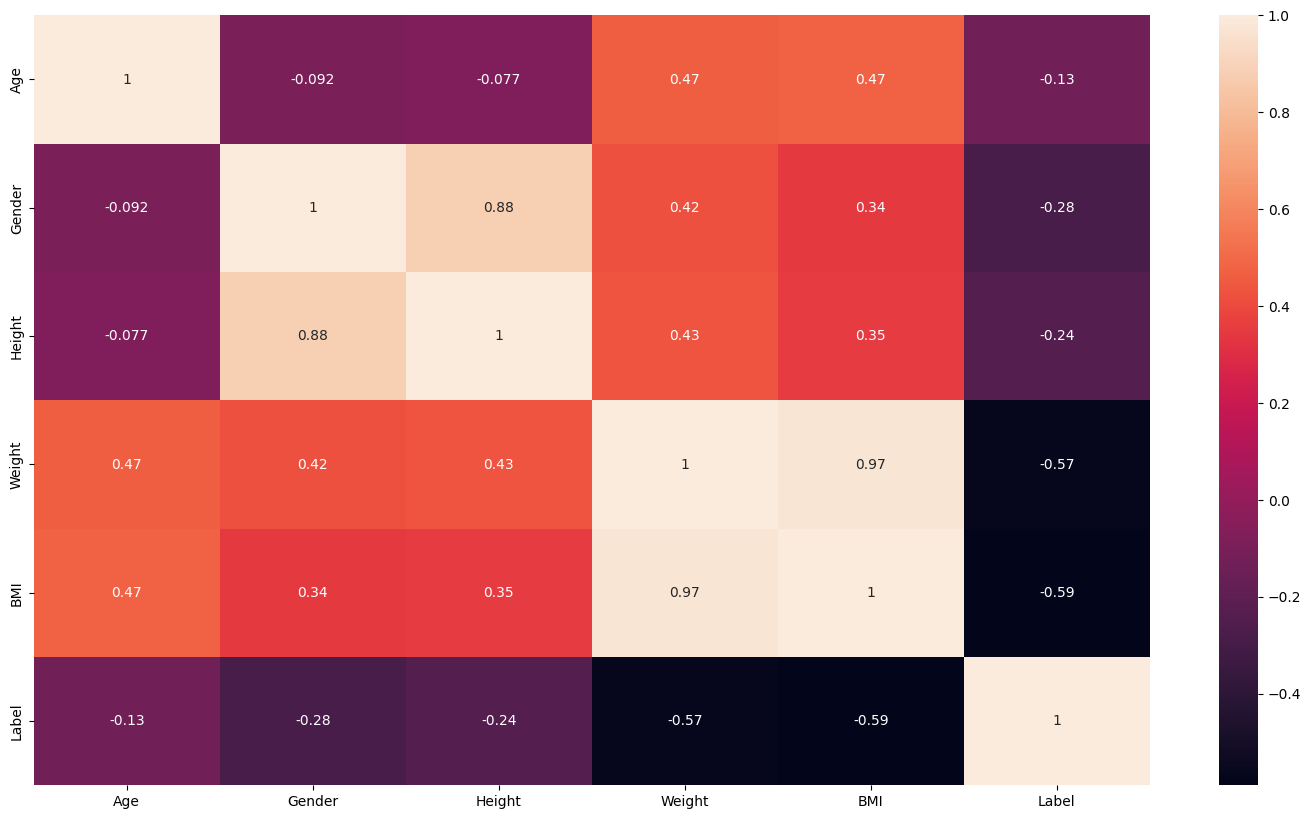

In [9]:
# Set the size of figure to 18 by 10.
plt.figure(figsize=(18,10))  
p=sns.heatmap(df.corr(), annot=True) 

#### From the above heatmap, it is clear that all the features have negative correlation with the target value. Also, the BMI and Weight have higher correlation with the target value in comparision to the others.

### 4.2. For label counts

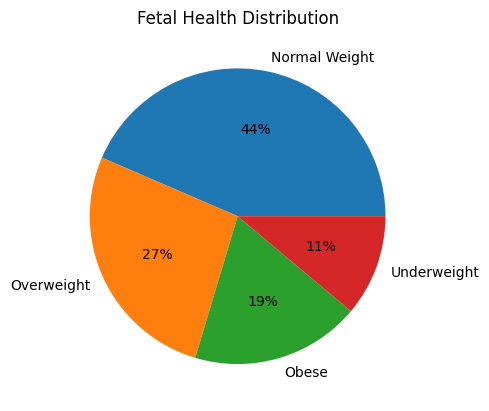

In [10]:
# Count the number of instances in each class
class_counts = df['Label'].value_counts()

# Create a list of labels
labels = ["Normal Weight", "Overweight", "Obese", "Underweight"]

# Create a list of values
values = class_counts.values

# Plot the pie chart
plt.pie(values, labels=labels, autopct="%1.0f%%")

# Add a title
plt.title("Fetal Health Distribution")

# Show the plot
plt.show()

#### From the pie chart, it is evident that highest amount of our data falls under 'Normal Weight' category and lowest amount of data falls under 'Underweight' category.

## 5. Splitting the data into train and test sets

In [11]:
# Separate the features (X) and the target variable (y). 
X = df.drop('Label', axis=1)
y = df['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Building the model

In [12]:
# Create a Random Forest classifier
model = RandomForestClassifier()

# Train the classifier on the training data
model.fit(X_train, y_train)

RandomForestClassifier()

## 7. Evaluating the model

In [13]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


#### We obtained 100% accuracy which may be due to the small datasets that we have.

## 8. Taking input from the user and predicting

In [16]:
def predict(data, encoder):
    # Make predictions using the model
    prediction = model.predict(data)
    
    # Convert numeric predictions back to original text labels
    text_prediction = encoder.inverse_transform(prediction)
    return text_prediction


def manual_data_input():
    # Let the user manually enter data
    print("Enter the data for prediction:")
    age = float(input("Age: "))
    gender = input("Gender (0 for female, 1 for male): ")
    height = float(input("Height (in cm): "))
    weight = float(input("Weight (in kg): "))
    bmi = float(input("BMI: "))
    
    # Create a DataFrame from the input data
    data = pd.DataFrame([[age, gender, height, weight, bmi]], 
                        columns=['Age', 'Gender', 'Height', 'Weight', 'BMI'])
    return data

def file_data_input():
    # Let the user specify a data file
    file_path = input("Enter the path of your data file (CSV format): ")
    if os.path.exists(file_path):
        data = pd.read_csv(file_path)
        return data
    else:
        print("File not found. Please check the file path.")
        return None

def main():
    print("Choose the data input method:\n1. Upload data file\n2. Enter data manually")
    choice = input("Enter your choice (1 or 2): ")

    if choice == '1':
        data = file_data_input()
    elif choice == '2':
        data = manual_data_input()
    else:
        print("Invalid choice.")
        return

    if data is not None:
        predictions = predict(data, label)
        advice = {
            'Normal Weight': 'Your weight is in a healthy range. Maintain a balanced diet and regular exercise.',
            'Overweight': 'Consider lifestyle changes like increased physical activity and a balanced diet.',
            'Underweight': 'You might need to consume more calories. Consider a nutritionist’s advice.',
            'Obese': 'It’s recommended to consult a healthcare provider for a personalized health plan.'
        }
        for prediction in predictions:
            if prediction in advice:
                print(f"{prediction}:", advice[prediction])


if __name__ == "__main__":
    main()

Choose the data input method:
1. Upload data file
2. Enter data manually


Enter your choice (1 or 2):  1
Enter the path of your data file (CSV format):  C:\Users\sapan\Downloads\Obesity Classification - Copy.csv


Normal Weight: Your weight is in a healthy range. Maintain a balanced diet and regular exercise.
Normal Weight: Your weight is in a healthy range. Maintain a balanced diet and regular exercise.
